# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background
Capstone Project Webscrapping ini merupakan salah satu tugas project dari hasil belajar menyelesaikan semua modul dan graded assignment pada Data Analytics Specialization. Capstone project ini dikerjakan dengan mengimplementasikan materi-materi yang telah dipelajari sebelumnya meliputi Python for Data Analysis, Exploratory Data Analysis, Data Wrangling & Visualization, serta SQL Query. Dalam Capsote Project ini, project yang saya pilih adalah Webscrapping Using BeautifulSoup. Webscrapping sendiri merupakan proses pengumpulan data web terstruktur yang dilakukan secara otomatis dengan menggunakan aplikasi atau kode pemrograman khusus. 

Dasar pemilihan webscrapping didasarkan agar dapat dipahami dan diimplementasikan dalam pekerjaan sehari-hari. Webscrapping kali ini menggunakan library python BeautifulSoup yang digunakan untuk mengambil data HTML dan XML. BeautifulSoup berfungsi sebagai parser untuk memisahkan komponen-komponen HTML menjadi rangkain elemen yang mudah dibaca. Studi kasus yang dipilih perihal Data Volume Penjualan Ethereum yang bersumber dari https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel'.  Dari halaman tersebut terdapat data 'Date', 'Volume', 'Market Cap', 'Open	Close' sedangkan data yang diperlukan dalam menghitung dan mem-plotting pergerakan data volume penjualan ethereum adalah dengan menggunakan data 'Date', dan 'Volume'.


## Requesting the Data and Creating a BeautifulSoup

Untuk memulai mari dimulai dengan melakukan request web dari situs menggunakan method `get`. Dimulai dengan melakukan impor modul dan membuat request.

In [18]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data#panel',  headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use `.content` so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [19]:
url_get.content[1:10000000]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n  new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n  j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n  \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n  })(window,document,\'script

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

Kita akan melakukan parsing html yang telah didapatkan dengan menggunakan `html.parser` dari Library BeautifulSoup. Hasil parsing yang dilakukan disimpan pada variable soup. Disini, kita sudah bisa melakukan ekstraksi terhadap informasi yang kita perlukan.

In [20]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Data yang kita miliki masih tidak terstruktur sehingga dengan syntax `soup.prettify()` yang merupakan fungsi dari BeautifulSoup untuk merapikan file html dengan memberikan identasi dan newline sehingga menghasilkan data yang lebih rapi dapat dibaca dengan mudah.

In [21]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


## Finding the right key to scrap the data & Extracting the right information

Selanjutnya kita men-define variable baru untuk menyimpan tabel yang kita temukan dengan menggunakan fungsi `find()` dari Library BeautifulSoup, sehingga kita memperoleh right key untuk diolah datanya karena berbentuk tree code. Fungsi `find()` mengambil potongan kode HTML atau kode HTML secara spesifik (jika terdapat tag HTML atau class atau id yang sama lebih dari satu maka tag yang diambil adalah tag yang paling atas di halaman HTML). 

In [22]:
table = soup.find('table',attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:1000])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2022-10-02
   </th>
   <td class="text-center">
    $158,410,068,981
   </td>
   <td class="text-center">
    $5,052,407,841
   </td>
   <td class="text-center">
    $1,311.26
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2022-10-01
   </th>
   <td class="text-center">
    $160,462,955,554
   </td>
   <td class="text-center">
    $11,849,125,784
   </td>
   <td class="text-center">
    $1,329.15
   </td>
   <td class="text-center">
    $1,311.26
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center


Mencari panjang data yang kita peroleh dengan `len` yang diperlukan dalam proses perulangan yang berfungsi untuk mengekstraksi data secara otomatis. 

In [23]:
row = table.find_all('tr')
row_length = len(row)
row_length

32

Fungsi `find_all()` digunakan untuk mengetahui semua tag baik dengan nama atau id yang ditentukan dan mengembalikannya dalam bentuk sebuah list dari tipe bs4. Karena data yang kita ekstrak disimpan dalam konten maupun atribut yang berbeda, sehingga untuk memperoleh informasi tersebut perlu diperoleh dari tag yang lebih besar atau diatasnya yaitu`td`.

In [24]:
table.find_all('td', attrs={'class':'text-center'})[1].text

'\n$5,052,407,841\n'

Untuk memperoleh hanya informasi yang bertipe text, maka dapat ditambahkan dengan `.text`. Seperti pada line diatas, untuk memperoleh key terkait nilai volume ethereum dan menghilangkan informasi yang tidak diperlukan. Serta pada line dibawah untuk dapat mengekstraksi informasi data tanggal, menggunakan `.text`.

In [25]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text

'2022-10-02'

## Mengekstrak Informasi
Disini kita akan melakukan ekstraksi data agar sesuai dengan bentuk yang kita inginkan serta agar dapat kita proses pada tahap selanjutnya. Ekstraksi data yang kita perlukan dilakukan melalui perulangan yang bertujuan untuk mengikis yang dianggap excess white space, yang meliputi :

- Pertama kita perlu meembuat placeholder untuk menerima informasi yang kita hapus.
- Placeholder tersebut dinamai `temp` yang merupakan sebuah list.
- Kemudian kita akan melakukan looping dari satu sampai panjang baris tabel,
- yang mana kita akan temukan semua sel dari kolom satu dan dua yang berisi tanggal dan volume.
- Kemudian kita akan menambahkannya ke tupel kita yang kita persiapkan sebelumnya,
- setiap satu iterasi kita akan mengikis satu baris tabel dengan `.strip`.

In [26]:
temp = [] #init

for i in range(1, row_length):
    
    #get Date 
    date = row[i].th.text
    
    #get Volume
    volume = row[i].find_all('td')[1].text.strip()
    
    temp.append((date,volume)) 
    
temp
#looping all tabel baru di slicing

[('2022-10-02', '$5,052,407,841'),
 ('2022-10-01', '$11,849,125,784'),
 ('2022-09-30', '$11,834,328,252'),
 ('2022-09-29', '$16,571,161,476'),
 ('2022-09-28', '$16,685,874,856'),
 ('2022-09-27', '$15,270,197,376'),
 ('2022-09-26', '$10,552,647,870'),
 ('2022-09-25', '$11,251,326,609'),
 ('2022-09-24', '$17,599,766,731'),
 ('2022-09-23', '$17,517,188,721'),
 ('2022-09-22', '$18,732,743,242'),
 ('2022-09-21', '$13,605,986,462'),
 ('2022-09-20', '$17,757,533,838'),
 ('2022-09-19', '$14,696,599,277'),
 ('2022-09-18', '$10,309,763,882'),
 ('2022-09-17', '$17,892,819,035'),
 ('2022-09-16', '$24,787,864,367'),
 ('2022-09-15', '$17,198,033,718'),
 ('2022-09-14', '$22,286,700,927'),
 ('2022-09-13', '$16,770,566,236'),
 ('2022-09-12', '$11,692,754,175'),
 ('2022-09-11', '$12,521,808,521'),
 ('2022-09-10', '$19,418,675,071'),
 ('2022-09-09', '$16,676,188,643'),
 ('2022-09-08', '$18,560,005,397'),
 ('2022-09-07', '$20,860,201,644'),
 ('2022-09-06', '$11,815,125,729'),
 ('2022-09-05', '$7,827,505,1

Dari proses sebelumnya kita mendapat data yang sedikit berbeda dari laman web sumber 'https://www.coingecko.com/en/coins/ethereum/historical_data#panel' bahwa data yang diperoleh terbalik. Untuk melakukan analisis lebih lanjut, mari kita balikkan daftar kita dengan menggunakan `::-1`

In [27]:
temp = temp[::-1]
temp[:10]

[('2022-09-02', '$15,076,286,517'),
 ('2022-09-03', '$15,857,654,357'),
 ('2022-09-04', '$8,500,114,334'),
 ('2022-09-05', '$7,827,505,125'),
 ('2022-09-06', '$11,815,125,729'),
 ('2022-09-07', '$20,860,201,644'),
 ('2022-09-08', '$18,560,005,397'),
 ('2022-09-09', '$16,676,188,643'),
 ('2022-09-10', '$19,418,675,071'),
 ('2022-09-11', '$12,521,808,521')]

## Creating data frame & Data wrangling

Setelah menyesuaikan dan membalikan data, selanjutnya data tersebut yang berbentuk array ke dalam sebuah DataFrame pandas sehingga kita dapat melakukan analisis data.

In [28]:
import pandas as pd
import numpy as np

df = pd.DataFrame(temp, columns = ('tanggal','volume'))

df.head()

,tanggal,volume
0,2022-09-02,"$15,076,286,517"
1,2022-09-03,"$15,857,654,357"
2,2022-09-04,"$8,500,114,334"
3,2022-09-05,"$7,827,505,125"
4,2022-09-06,"$11,815,125,729"


Selanjutnya kita periksa tipe data dari dataframe yang kita buat. Hal ini mengacu pada proses melakukan investigasi awal pada data, seringkali dengan tujuan untuk lebih mengenal dengan karakteristik data tertentu. Atribut `dtypes` digunakan untuk melakukan inspeksi tipe data. Untuk perubahan tipe data, kita dapat melakukan perubahan dengan method `.astype()` yang dapat diaplikasikan pada series (kolom) yang ingin diubah.

In [29]:
df.dtypes

tanggal    object
volume     object
dtype: object

Setelah mengecek tipe data dari data yang kita ekstrak, selanjutnya kita sesuaikan baris Tanggal dengan tipe data datetime64 dan Volume dengan tipe data float. selain itu, dengan method `.replace()` dilakukan untuk membersihkan data.

In [30]:
df['tanggal'] = df['tanggal'].astype('datetime64')

In [31]:
df['volume'] = df['volume'].replace('[\$,]', '', regex=True).astype(float)
df.dtypes

tanggal    datetime64[ns]
volume            float64
dtype: object

Untuk membuat plot kita sesuai seperti yang kita inginkan, kita perlu mengatur indeks kerangka data kita ke coloumn tanggal dengan menggunakan`set_index()` yang kemudian disimpan dalam variable df.

In [32]:
df = df.set_index('tanggal')

Nantinya, kita akan menampilkan data rata-rata volume harga Ethereum selama satu bulan terakhir. Data dari hasil ekstraksi sebelumnya diproses sedemikian rupa agar dapat diolah sesuai dengan yang kita inginkan. Namun, agar dapat mudah dibaca kembali di dashboard nanti maka kita gunakan ` f'{mean:,}'` untuk memberikan pemisah pada hasil rata-rata volume harga Ethereum. Rata-rata harga volume tersebut dihitung menggunakan fungsi `.mean()` dan `.round()` agar angka dibelakang koma dibulatkan menjadi 2. 

In [33]:
mean = df["volume"].mean().round(2)
card_data = f'{mean:,}'
card_data = "$ " + card_data
card_data

'$ 15,065,450,193.97'

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

Dan selesai, berikut merupakan visualisasi sederhana yang merupakan gambaran grafik yang nanti ditampilkan pada dashboard sederhana kita.

<AxesSubplot:xlabel='tanggal'>

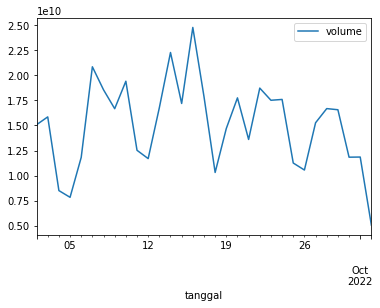

In [34]:
df.plot()

📈 Insight dan Analisis:
- Secara umum pergerakan volume harga Ethereum periode September - Oktober 2022 cenderung fluktuatif
- Pada tanggal 16 September 2022 merupakan perolehan Volume harga Ethereum tertinggi sebesar 24,787,864,367 pada periode September - Oktober 2022
- Pada Tanggal 05 September 2022 merupakan perolehan Volume harga Ethereum terendah sebesar 7,827,505,125 pada periode September - Oktober 2022
- Persebaran Volume harga (median) Ethereum paling tinggi pada nilai 16,571,161,476.0

### Kesimpulan
Kita dapat menggunakan Web scraping untuk mengumpulkan data dari sebuah halaman web terstruktur yang dilakukan secara otomatis dengan menggunakan aplikasi atau kode pemrograman khusus. Data yang dikumpulkan dapat berasal dari ribuan, jutaan, bahkan milyaran data yang terpampang di dunia maya. Proses automasi ini dapat dikustomisasi sesuai dengan data yang dibutuhkan sehingga dapat meminimalisir informasi yang tidak perlu.Dengan penerapannya yang efektif, bukan tidak mungkin data yang dihasilkan dapat berpengaruh besar terhadap pengambilan keputusan sebuah bisnis dan pengambilan keputusan. Pada project capstone kali ini kita melakukan webscrapping dengan python dan beautifulsoup.

Cara kerja web scraper sebagai berikut pertama, web scraper akan diberikan sejumlah URL untuk dimuat sebelum dilakukan proses scraping. Scraper kemudian memuat kode HTML laman yang dituju, scrapper juga mampu memuat seluruh isi dalam website, termasuk CSS dan elemen Javascript. Selanjutnya, scraper mengekstrak data yang sebelumnya sudah dipilih sebelum program dijalankan. Data yang sudah diekstrak kemudian akan dikumpulkan dalam satu format, yang nantinya akan digunakan oleh data scientist untuk proses analisis. Format yang digunakan dapat berupa CSV, Excel, atau bahkan format JSON yang nantinya bisa digunakan sebagai API.

Setelah data diperoleh setelah itu kita perlu melakukan pembuatan data frame. Dari data frame yang diperoleh langkah selanjutnya yaitu melakukan data analisis dan data wrangling dengan investigasi awal pada data, hal ini bertujuan untuk lebih mengenal dengan karakteristik data tertentu, bantuan ringkasan statistik dan teknik grafis sederhana untuk melihat struktur data yang kita miliki dengan`.dtypes`. Pada project ini kita mengubah tipe data tanggal menggunakan `datetime64` yang merupkan sebuah tipe data pada `pandas` yang memiliki atribut tanggal dan/atau waktu. Serta Method `.astype()` untuk mengubah tipe data string menjadi float.

Setelah data yang diolah dirasa telah menghasilkan apa yang diinginkan dan telah sesuai maka kita lakukan Visualisasi terhadap data tersebut. Karena dengan visualisasi, kita difasilitasi untuk secara cepat dan sederhana untuk menggali insight serta proses untuk mempercantik visualisasi dan menyajikannya dalam bentuk dashboard/reporting pada `pandas`, kita dapat menggunakan method `.plot()` untuk melakukan visualisasi dengan bantuan package `matplotlib`.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.